# Course: Introduction to Machine Learning
# Aissigment I
### Instructor: Tan Bui-Thanh
### TA: Hai Nguyen
#### Due day ??? Sep 2022 


## **Question 1** (Linear regression for 2 linear features)

Loading UCI Diabetes Dataset and considering the *BMI* and *BP* features, denoted as $x_1, x_2$, respectively. And, the diabetes risk score is the target denoted as $y$. We assuming the linear model has the form of

$$ \bar{y} = 0.4638 + \theta_1 x_1 + \theta_2 x_2.$$

The mean square error loss function

$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where $n$ is the number of patients

- (1.a) (+25 pt) Using the gradient descent algorithm to find the optimal $\theta_1$ and $\theta_2$.

- (1.b) (+5 pt) Plotting the contour map of the loss function over the square domain $[0,4]^2$

- (1.c) (+10 pt) Plotting the gradient descent direction lines on the contour map from two initial guess $(\theta_1, \theta_2) = (4,4)$ and $(\theta_1, \theta_2) = (0,0)$. (You should plot a point each 100 iterations)

## Solutions for Q1: 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta) + 0.4638

def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# # add an extra column of onens
# X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([4,4]), np.array([1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
        
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.030014
[4 4]
Iteration 100. MSE: 0.025863
bmi    3.764689
bp     3.667580
dtype: float64
Iteration 200. MSE: 0.022745
bmi    3.566838
bp     3.375289
dtype: float64
Iteration 300. MSE: 0.020399
bmi    3.401171
bp     3.117795
dtype: float64
Iteration 400. MSE: 0.018630
bmi    3.263141
bp     2.890491
dtype: float64
Iteration 500. MSE: 0.017291
bmi    3.148823
bp     2.689394
dtype: float64
Iteration 600. MSE: 0.016274
bmi    3.054837
bp     2.511064
dtype: float64
Iteration 700. MSE: 0.015498
bmi    2.978265
bp     2.352524
dtype: float64
Iteration 800. MSE: 0.014903
bmi    2.916596
bp     2.211203
dtype: float64
Iteration 900. MSE: 0.014444
bmi    2.867662
bp     2.084876
dtype: float64
Iteration 1000. MSE: 0.014087
bmi    2.829599
bp     1.971617
dtype: float64
Iteration 1100. MSE: 0.013806
bmi    2.800799
bp     1.869764
dtype: float64
Iteration 1200. MSE: 0.013584
bmi    2.779877
bp     1.777874
dtype: float64
Iteration 1300. MSE: 0.013406
bmi    2.765642
bp    

### (1.a)

In [44]:
print(' Optimal solutions is : %.4f and %.4f' % (theta[0], theta[1]))

 Optimal solutions is : 3.6106 and 0.2301


### (1.b)

In [45]:
mesh_points = 101
theta1_grid = np.linspace(0,4,mesh_points)
theta2_grid = np.linspace(4,0,mesh_points)

theta_1_cordinate, theta_2_cordinate = np.meshgrid(theta1_grid,theta2_grid)
loss_value = np.zeros((mesh_points, mesh_points))

for i in range(mesh_points):
    for j in range(mesh_points):
        loss_value[i,j] = mean_squared_error((theta_1_cordinate[i,j],theta_2_cordinate[i,j]) , X_train, y_train)

Text(0.5, 1.0, 'Contour map of MSE loss')

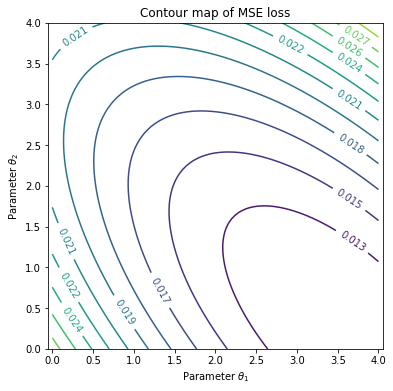

In [58]:
plt.figure(figsize=(6,6))
contours = plt.contour(theta_1_cordinate, theta_2_cordinate, loss_value, 15)
plt.clabel(contours)
plt.xlim((0,4)), plt.xlabel('Parameter ' + r'$\theta_1$')
plt.ylim((0,4)), plt.ylabel('Parameter ' + r'$\theta_2$')
plt.axis('equal')
plt.title('Contour map of MSE loss')

### (1.c) 

In [97]:
theta, theta_prev = np.array([4,4]), np.array([1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

theta_saved = theta
gradient_saved = []
while np.linalg.norm(theta - theta_prev) > threshold:    
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    
    if iter % 200 == 0:
        theta_saved = np.concatenate((theta_saved, theta), axis = 0)
        gradient_saved = np.concatenate((gradient_saved, gradient), axis = 0)
    
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

point_44 = np.reshape(theta_saved, (-1, 2))
grad_44 = np.reshape(gradient_saved, (-1, 2))

In [98]:
theta, theta_prev = np.array([0,0]), np.array([1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

theta_saved = theta
gradient_saved = []
while np.linalg.norm(theta - theta_prev) > threshold:    
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    
    if iter % 200 == 0:
        theta_saved = np.concatenate((theta_saved, theta), axis = 0)
        gradient_saved = np.concatenate((gradient_saved, gradient), axis = 0)
    
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

point_00 = np.reshape(theta_saved, (-1, 2))
grad_00 = np.reshape(gradient_saved, (-1, 2))

(0.0, 4.0, 0.0, 4.0)

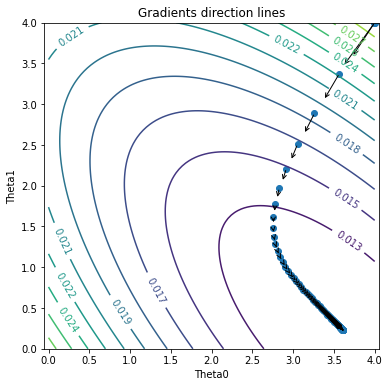

In [104]:
plt.figure(figsize=(6,6))
contours = plt.contour(theta_1_cordinate, theta_2_cordinate, loss_value, 15)
plt.clabel(contours)

line_length = 60

for theta_1, theta_2, grad_theta_1, grad_theta_2 in zip (point_44[:,0], point_44[:,1], grad_44[:,0], grad_44[:,1]):
    plt.annotate('', xytext=(theta_1, theta_2), 
                     xy=(theta_1 - line_length * grad_theta_1, theta_2 - line_length * grad_theta_2),
                     arrowprops={'arrowstyle': '->', 'lw': 1}, va='center', ha='center', color='blue')
plt.scatter(point_44[:,0], point_44[:,1])

for theta_1, theta_2, grad_theta_1, grad_theta_2 in zip (point_00[:,0], point_00[:,1], grad_00[:,0], grad_00[:,1]):
    plt.annotate('', xytext=(theta_1, theta_2), 
                     xy=(theta_1 - line_length * grad_theta_1, theta_2 - line_length * grad_theta_2),
                     arrowprops={'arrowstyle': '->', 'lw': 1}, va='center', ha='center', color='red')
plt.scatter(point_00[:,0], point_00[:,1])

plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients direction lines')
plt.axis('equal')

In [ ]:
# theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.75])
# dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

# contours = plt.contour(X, Y, J_grid, 10)
for theta0_pt, theta1_pt, df0 in zip(point, theta1_pts, dfs):
    plt.annotate('', xytext=(theta0_pt, theta1_pt), 
                     xy=(theta0_pt-line_length*df0[0], theta1_pt-line_length*df0[1]),
                     arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.clabel(contours)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients of the quadratic function')
plt.axis('equal')

## **Question 2** (Linear regression for 2 nonlinear features, Multivariate Polynomial Regression)

We still use the pairs of *BMI* and *BP* features ($x_1, x_2$). However, the linear model now is changed to

$$ \bar{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2$$

The mean square error loss function

$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where $n$ is the number of patients

- (2.a) (+30 pt) Using the gradient descent algorithm to find the optimal $\theta_i, i = 0, ..., 5$

## **Question 3** (Linear regression for 2 nonlinear features)

Now instead of using gradient descent in question 2, you shall use the ordinary least squares approach to 

- (3.a) (+30 pt) derive the optimal solution $$\theta^* = ( \theta_0, \theta_1,\theta_2,\theta_3,\theta_4,\theta_5)$$

$\text{Hint}^*:$ you can consider the matrix data are columns of 

$$ X = \begin{bmatrix}
- & \bar{x}^{(1)} & - \\
- & \bar{x}^{(2)} & -  \\
- & \vdots  & - \\
- & \bar{x}^{(n)} & - 
\end{bmatrix}
$$

where $ \bar{x} = (1, x_1, x_2,x_1x_2,x^2_1, x^2_2)$ is a row vector and $n$ is the number of patients

- (3.b) (Bounus +5): Is your $\theta^*$ is exactly the same as the question 2? why (Yes/No)?